# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 22 - 5to bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del viernes 14 de noviembre (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar tanto los contenidos vistos en clase, como otra bibliografía externa. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 33.33% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Importante permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/98W6TBHjyWnwAzTB9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co22.ipynb**
- Los códigos deben poder ejecutarse.
- **IMPORTANTE:** Los resultados, cómo el código, los gráficos, los prints y las explicaciones deben quedar guardados y visualizables en el mismo notebook.
- **Prestar mucha atención a cada consigna, responder las preguntas justo debajo del enunciado que corresponda.**
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1** (Temas de la clase 1 y 2)

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = a(z) = \tanh(z) = \tanh(w x + b)
$$

<br>

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

<br>

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

<br>

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores ($n>=200$). Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

<br>

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal (elegido por ustedes) con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.

El patrón no lineal puede ser una función trigonométrica, exponencial, logarítmica, sigmoidal o polinómica de grado mayor o igual a 3.

### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()`.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para los 3 learning rates.

<br>

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a=0.12078080719037335 ; b=-0.6132217490828135


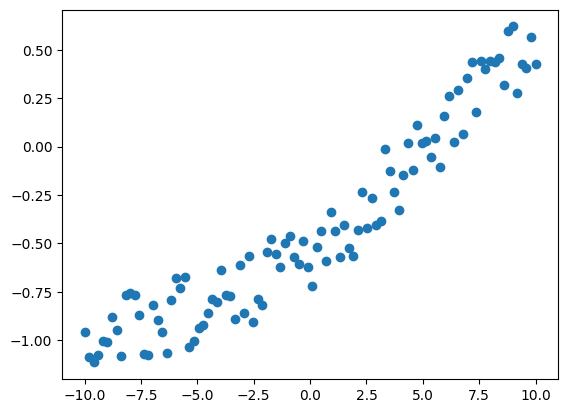

In [280]:
# Definamos primero el dataset
x = np.linspace(-10,10,100)
# x = np.linspace(-3,3,100)
# Hagamos la función no lineal como la derivada de la sigmoide
a = np.random.randn()
b = np.random.randn()
print(f"a={a} ; b={b}")
def dsig(x,a,b):
  z = a*x + b
  # return np.exp(-z)/((1+np.exp(-z))**2)
  # return 2 /(1+np.exp(-z))
  return np.tanh(z)
error = np.random.uniform(low=-0.2,high=0.2,size=x.shape[0])
y = dsig(x,a,b) + error
plt.scatter(x,y)

Tenemos que la función de pérdida viene dada por: 
$$
J(\theta) = \frac{1}{m} \sum (\hat{y}_i - y)^2
$$
Y la función de predicción es:
$$
\hat{y} = \tanh(w\cdot x + b)
$$
Queremos obtener el gradiente:
$$
\nabla_\theta J(\theta) = \begin{bmatrix}
    \cfrac{\partial J}{\partial w} \\
    \cfrac{\partial J}{\partial b}
\end{bmatrix}
$$
Si hacemos backpropagation tenemos que:
$$
\frac{\partial J}{\partial \theta_i} = \sum_j \frac{\partial J}{\partial \hat{y}_j} \frac{\partial \hat{y}_j}{\partial z_j} \frac{\partial z_j}{\partial \theta_i}
$$
Aclaración: se usa $z$ para denotar $w\cdot x + b$ y hacer más fáciles las derivadas.<br>
Calculemos las derivadas parciales:
$$
\begin{gather*}
\frac{\partial J}{\partial \hat{y}} = \frac{2}{m} (\hat{y} - y) \\
\frac{\partial \hat{y}}{\partial z} = \frac{1}{\cosh^2(z)} \\
\frac{\partial z}{\partial w} = x \\ 
\frac{\partial z}{\partial b} = 1
\end{gather*}
$$
Entonces tenemos:
$$
\begin{gather*}
\frac{\partial J}{\partial w} = \sum_j \frac{2}{m} (\hat{y}_j - y) \cdot \frac{1}{\cosh^2(z_i)} \cdot x \\
\frac{\partial J}{\partial b} = \sum_j \frac{2}{m} (\hat{y}_j - y) \cdot \frac{1}{\cosh^2(z_i)} \cdot 1
\end{gather*}
$$

In [238]:
def y_hat(x, w, b):
    return np.tanh(w * x + b)

def loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def dyhat_dtheta(x, w, b):
    z = w * x + b
    #return np.vstack((
    dydz = 1/(np.cosh(z)**2)
    return  np.column_stack((
        x,                  # dz/dw
        np.ones(x.shape)    # dz/db
    )) * dydz.reshape(-1,1)
    # ])

def dJ_dtheta(y, x, w, b):
    yhat = y_hat(x, w, b)
    dydt = dyhat_dtheta(x, w, b).transpose()
    return np.mean(2 * (yhat - y) * dydt, axis=1)

def update_theta(dJdtheta, theta, learning_rate):
    return theta - learning_rate * dJdtheta

It 0 -> J=0.5089459959161412 ; theta=[np.float64(1.6891740225016938), np.float64(-0.7472824665776479)] ; dJdtheta=[0.05891038 0.06168736]
It 10000 -> J=0.014319396594364977 ; theta=[np.float64(0.1243789469571799), np.float64(-0.6279649186597636)] ; dJdtheta=[ 4.88498131e-16 -5.53501689e-15]
It 0 -> J=1.2549248577477217 ; theta=[np.float64(-0.1644070433657947), np.float64(-0.38433715435732285)] ; dJdtheta=[-4.92098772  0.59382276]
It 10000 -> J=0.014319396594364977 ; theta=[np.float64(0.12437894695717616), np.float64(-0.6279649186597366)] ; dJdtheta=[-4.57411886e-16  5.54528645e-15]
It 0 -> J=1.9659565298781556 ; theta=[np.float64(-0.9232881422877037), np.float64(-1.145099334343886)] ; dJdtheta=[-0.28616107  0.12626698]
It 10000 -> J=0.014319396594364977 ; theta=[np.float64(0.1243789469571799), np.float64(-0.6279649186597636)] ; dJdtheta=[ 4.88498131e-16 -5.53501689e-15]
It 0 -> J=0.4884207437856262 ; theta=[np.float64(1.7371955903733354), np.float64(-1.1441826527676962)] ; dJdtheta=[0.

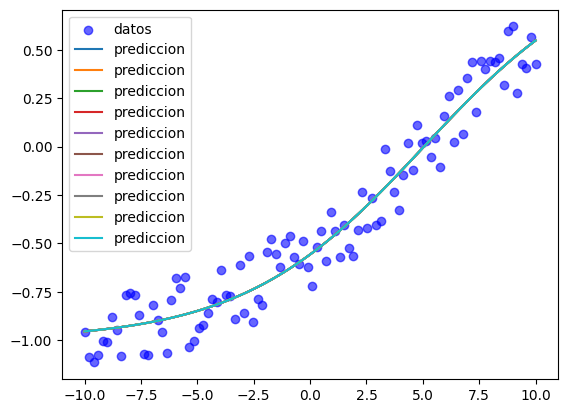

In [288]:
w = np.random.randn()
b = np.random.randn()

w0s = np.random.uniform(-2, high=2, size=10)
b0s = np.random.uniform(-2, high=2, size=10)

learning_rate = 0.01

plt.scatter(x,y, label='datos', color='blue', alpha=0.6)
for w, b in zip(w0s, b0s):
    yhat = y_hat(x, w, b)
    J = loss(y, yhat)
    dJdtheta = dJ_dtheta(y, x, w, b) 
    losses = [J]
    i = 0 
    print(f"It {i} -> J={J} ; theta={[w,b]} ; dJdtheta={dJdtheta}")
    while i < 10000:
        w, b = update_theta(dJdtheta, np.array([w, b], dtype='float'), learning_rate)
        yhat = y_hat(x, w, b)
        J = loss(y, yhat)
        losses.append(J)
        dJdtheta = dJ_dtheta(y, x, w, b) 

        i+=1
    print(f"It {i} -> J={J} ; theta={[w,b]} ; dJdtheta={dJdtheta}")
    plt.plot(x,yhat, label='prediccion')
plt.legend()

#plt.plot(range(i+1), losses)
#plt.yscale('log')

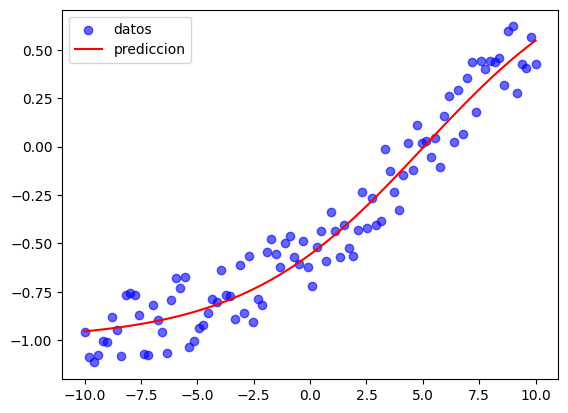

In [289]:
plt.scatter(x,y, label='datos', color='blue', alpha=0.6)
plt.plot(x,yhat, label='prediccion', color='red')
plt.legend()

### 1b) Implementación de Adam (2 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD.
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch.
- El batch size es a elección de ustedes, pero debe ser mayor o igual a 16.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época para comparar cómo converge la función para ambos modelos y para los 3 learning rates.

<br>

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates por separado. Hacerlo con gráficas y tablas.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

### **RECOMENDACIÓN**:

Les recomiendo revisar el notebook sobre optimizadores que se encuentra en el repo. Pueden acceder mediante el siguiente [enlace](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/blob/ap_2026/CLASE%202/Notebooks/clase2_4_optimizadores.ipynb). En ese notebook vemos cómo aplicar GD y Adam full-batch para una red con relación lineal. Les servirá mucho como guía para realizar esta pregunta.

Además, también tienen disponible el siguiente [material adicional del repo](https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/aprendizaje_profundo/tree/ap_2026/CLASE%202/Teoria/Material%20adicional), el cual le servirá para aplicar Adam, ya no solo en su versión full-batch, sino también en mini-batch

# **PREGUNTA 2** (Temas de la clase 3)

# Caso: Predicción del gasto promedio de los usuarios usando redes neuronales

**Descarga del dataset:**  
El conjunto de datos puede descargarse en el siguiente [enlace](https://drive.google.com/file/d/1e_FRepCpHBWWGj3TYG4HY7WHALCyR4wQ/view?usp=sharing)

---

## Descripción general:

El dataset recopila información sobre las compras realizadas por distintos clientes en una tienda durante el último año.  
Cada registro representa una transacción e incluye datos tanto del cliente como del producto adquirido.

---

## El dataset contiene la siguiente información:

- **User_ID:** Código identificador único del cliente que efectuó la compra.  
- **Product_ID:** Código identificador único del producto adquirido.  
- **Age:** Rango de edad del cliente.  
- **Gender:** Género del cliente (F: Femenino, M: Masculino).  
- **Marital_Status:** Estado civil del cliente (0: Soltero, 1: Casado).  
- **City_Category:** Tipo de zona donde se encuentra la sucursal donde se realizó la compra.  
  - A: Barrio de clase alta  
  - B: Barrio de clase media  
  - C: Barrio de clase media-baja  
- **Stay_In_Current_City_Years:** Número de años que el cliente ha venido comprando en la tienda desde su primera visita.  
- **Product_Category:** Categoría del producto comprado.  
- **Product_Subcategory_1:** Subcategoría principal del producto.  
- **Product_Subcategory_2:** Subcategoría secundaria del producto.  
- **Purchase:** Monto pagado por el producto en esa transacción.

---

## Objetivo del caso de estudio:

Desarrollar un **modelo predictivo** capaz de estimar el **gasto promedio** que realizará un cliente, a partir de su información demográfica y sus patrones de compra.


### 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores.
- Analizar qué columnas sirven para lograr el objetivo y cuáles no (drop) en base al contexto del negocio y a lo entendido del caso de estudio (feature engineering).
- Analizar con qué columnas vale la pena hacer un tratamiento de valores nulos o si simplemente se debe dropear toda la columna porque ya no tiene salvación.
- Analizar a qué variables se les debe hacer label encoding, a cuáles one-hot encoding, ordinal encoding o mapping encoding. Explicar los criterios utilizados para tomar esas decisiones.
- Transformar, agrupar, combinar y operar la data de tal manera que sea útil para extraer patrones de gastos y tendencias de gustos del cliente.



Redactar las conclusiones preliminares que puedan notar de cada feature y justificar el porqué de cada encoding, limpieza o transformación aplicada. Cada justificación se debe redactar a detalle y sustentar con gráficas y/o tablas.


In [17]:
df = pd.read_csv('dataset_compras.csv')
print(df.shape)
print(df.columns)
print(len(df['User_ID'].unique()))
print(len(df['Product_ID'].unique()))
print(df['Product_Category'].unique())
print(df['Product_Subcategory_1'].unique())
print(df['Product_Subcategory_2'].unique())
print(df['Product_Subcategory_2'].count())
print(len(df['Product_Subcategory_2']) - df['Product_Subcategory_2'].count())
print(df.head(10))

(182721, 11)
Index(['User_ID', 'Product_ID', 'Age', 'Gender', 'Marital_Status',
       'City_Category', 'Stay_In_Current_City_Years', 'Product_Category',
       'Product_Subcategory_1', 'Product_Subcategory_2', 'Purchase'],
      dtype='object')
7432
2455
[10 11  4 16  3  5 17  1 19 18  6  2 13  9 12 20 15  8 14  7]
[45. 27. 28.  9. nan 16. 24. 20. 36. 40. 25. 30. 35. 12. 22.  4. 32. 39.
 21. 42.  6. 13. 11. 10. 14. 18.  7. 44.  3. 26.  5. 33.  8. 15.]
[nan  8. 16.  5. 11. 17. 10. 18. 13. 14. 19.  9. 20. 12.  6. 15.  7.]
77461
105260
   User_ID Product_ID    Age Gender  Marital_Status City_Category  \
0  1044096  P00017122  46-50      F               1             B   
1  1071818  P00074517  36-45      M               0             A   
2  1022986  P00013694  36-45      M               1             A   
3  1094684  P00049122  36-45      M               1             A   
4  1004157  P00006469  46-50      M               1             A   
5  1047008  P00024740  18-25      M           

**NOTAS**
- hay que convertir `Age` a una variable categórica pero numérica. El intervalo más chico de edad es 0 y los siguientes van sumando de ahí
- ídem `Gender` y `City_Category`
- V. Categóricas
  - `Age`, `City_Category` y `Stay_In_Current_City_Years` tienen ordinalidad
  - `Gender`, `Marital_Status` y las categorías no

### 2b) Modelo Multilayer Perceptron (MLP) (2.5 puntos)
Entrenar un modelo de deep learning usando PyTorch que consuma el dataframe ya pre-procesado en el paso anterior.

Características para el diseño de la red:
- El modelo debe tener un mínimo de 3 capas ocultas.
- El modelo debe tener un mínimo de 32 neuronas por cada capa oculta.
- Cada capa oculta debe tener su respectiva función de activación.
- La elección de la función de activación de las capas ocultas es libre, pero se debe justificar por qué se está eligiendo esa, ya sea mediante conceptos teóricos o con resultados de pruebas empíricas.
- Analizar y justificar cuál es la mejor función de costo, algoritmo de optimización y learning rate para este modelo.
- Analizar cuál sería el mejor número de épocas para entrenar el modelo.
- Opcional: Incluir técnicas de regularización como dropout en las capas ocultas.

### 2c) Evaluación del Modelo (1 punto)
- Graficar las evoluciones por época de la función de costo y del $R^2$, tanto para el set de train como el de validation.
- Gráfica scatter de Real VS Predicho en el set de validation.
- Explicar el proceso de iteracion utilizado para conseguir los mejores resultados y justificar los resultados obtenidos.
- Un resultado aceptable sería un $R^2$ de al menos 0.55 para el set de validation.

### 2d) Conclusiones finales (0.5 puntos)
Redactar de manera detallada las conclusiones finales y si se cumplió con el objetivo o no.